## Hypothèse 2

Notre hypothèse de recherche est la suivante : « Certains aéroports new-yorkais sont plus touchés par les retards. ».

### Rôle de l'Hypothèse

Cette hypothèse est fondamentale car elle guide le choix de nos variables, de nos outils de visualisation, et l'interprétation de nos résultats.

- Variables Clés : Pour tester cette hypothèse, nous avons concentré notre analyse sur la variable catégorielle **origin** (aéroport de départ : JFK, LGA, EWR) et sur la variable numérique **arr_delay** (retard à l'arrivée).

- Objectif de l'Analyse : L'objectif est de comparer la moyenne et la distribution des retards (arr_delay) entre les trois groupes définis par la variable origin.

### Justification des Visualisations (Plots)

Les trois plots que nous avons réalisés avaient pour but de confirmer ou d'infirmer cette hypothèse sous différents angles :

  - Plot 1 (Matplotlib Bar Chart) : Il a quantifié les retards en montrant le nombre absolu d'événements (vols avec >30 minutes de retard). Il a confirmé que l'aéroport le plus touché (EWR) subissait non seulement les retards moyens les plus longs, mais produisait également le plus grand nombre de retards sévères.

  
  - Plot 2 (Seaborn Boxplot) : Il a servi à montrer la distribution statistique des retards pour chaque aéroport. En observant les médianes et les quartiles, nous avons pu identifier quel aéroport présentait la tendance moyenne la plus élevée au retard (Newark/EWR).

  - Plot 3 (GeoPandas Map) : Il a apporté un contexte géographique à l'hypothèse. En visualisant le réseau de destinations de chaque aéroport, nous avons pu supposer que l'aéroport le plus en retard (EWR) pourrait avoir un réseau de routes plus complexe ou plus long, ce qui contribue potentiellement à sa vulnérabilité aux retards.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

1. Charge le csv

In [14]:

df = pd.read_csv('/content/nycflights.csv')

 2. Préparation et Filtrage des Données

In [15]:



# touts arrive meme avance
df_arrive = df.dropna(subset='arr_delay')
comptes_Tout = df_arrive['origin'].value_counts()


df_touts_retards = df_arrive[df_arrive['arr_delay'] > 0] # plus 0 tojour retard
comptes_Tout_retard = df_touts_retards['origin'].value_counts()


df_retard_grave = df_arrive[df_arrive['arr_delay'] > 30] # retard grave plus 30 min
comptes_grave_30 = df_retard_grave['origin'].value_counts()

#print(len(df_arrive),len(df_touts_retards))

table_comparasion = pd.DataFrame({ 'Total Arrivées':comptes_Tout,
                                  'Total Retard': comptes_Tout_retard,
                                   'Retard > 30 min': comptes_grave_30,
                                   'r-grave/retard':((comptes_grave_30/comptes_Tout_retard)*100).round(2),
                                   'r-grave/arrivess':((comptes_grave_30/comptes_Tout)*100).round(2)

})
table_comparasion


,Total Arrivées,Total Retard,Retard > 30 min,r-grave/retard,r-grave/arrivess
origin,,,,,
EWR,11771,5073,2030,40.02,17.25
JFK,10897,4374,1694,38.73,15.55
LGA,10067,4015,1453,36.19,14.43


 3. Création du Graphique à Barres (Matplotlib)

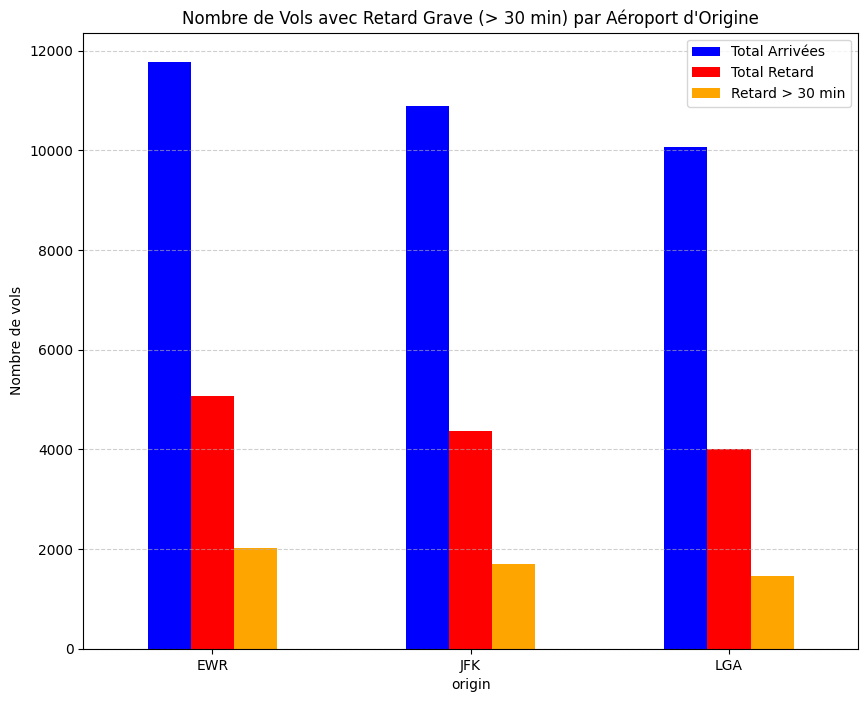

<Figure size 640x480 with 0 Axes>

In [16]:
#cree figure
table_comparasion[['Total Arrivées','Total Retard', 'Retard > 30 min']].plot(
    kind='bar',
    figsize=(10,8),
    color=['blue','red','orange'],
    rot=0
)

plt.title("Nombre de Vols avec Retard Grave (> 30 min) par Aéroport d\'Origine")
plt.ylabel("Nombre de vols")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
plt.savefig("serdar_varol_mtpl_plot1.png")

Interprétation (Plot 1)

**Observation :** L'aéroport de Newark (EWR) enregistre le plus grand nombre absolu de retards graves (plus de 30 minutes), suivi par JFK, puis LGA.

**Conclusion par rapport à l'Hypothèse :** Ce graphique confirme l'Hypothèse 2. Il montre que non seulement EWR a la plus longue moyenne de retard (vu avec le Boxplot/Plot 1), mais il est aussi la source du plus grand nombre d'événements de retards extrêmes.